# KKN - Wine dataset classification

In this notebook we wiil try to classify the wine dataset using KKN (K-Nearest Neighbors) algorithm.

First try will be with using all the dataset and then we will try to use only the most important features.

For all test the dataset will be splitted in train and test set in ratio 70/30. 

The last part will cover datasets with removed rows and restored rows.

Accuracy of KNN on winequality-red: 0.8125
Accuracy of KNN on winequality-white: 0.7401360544217687


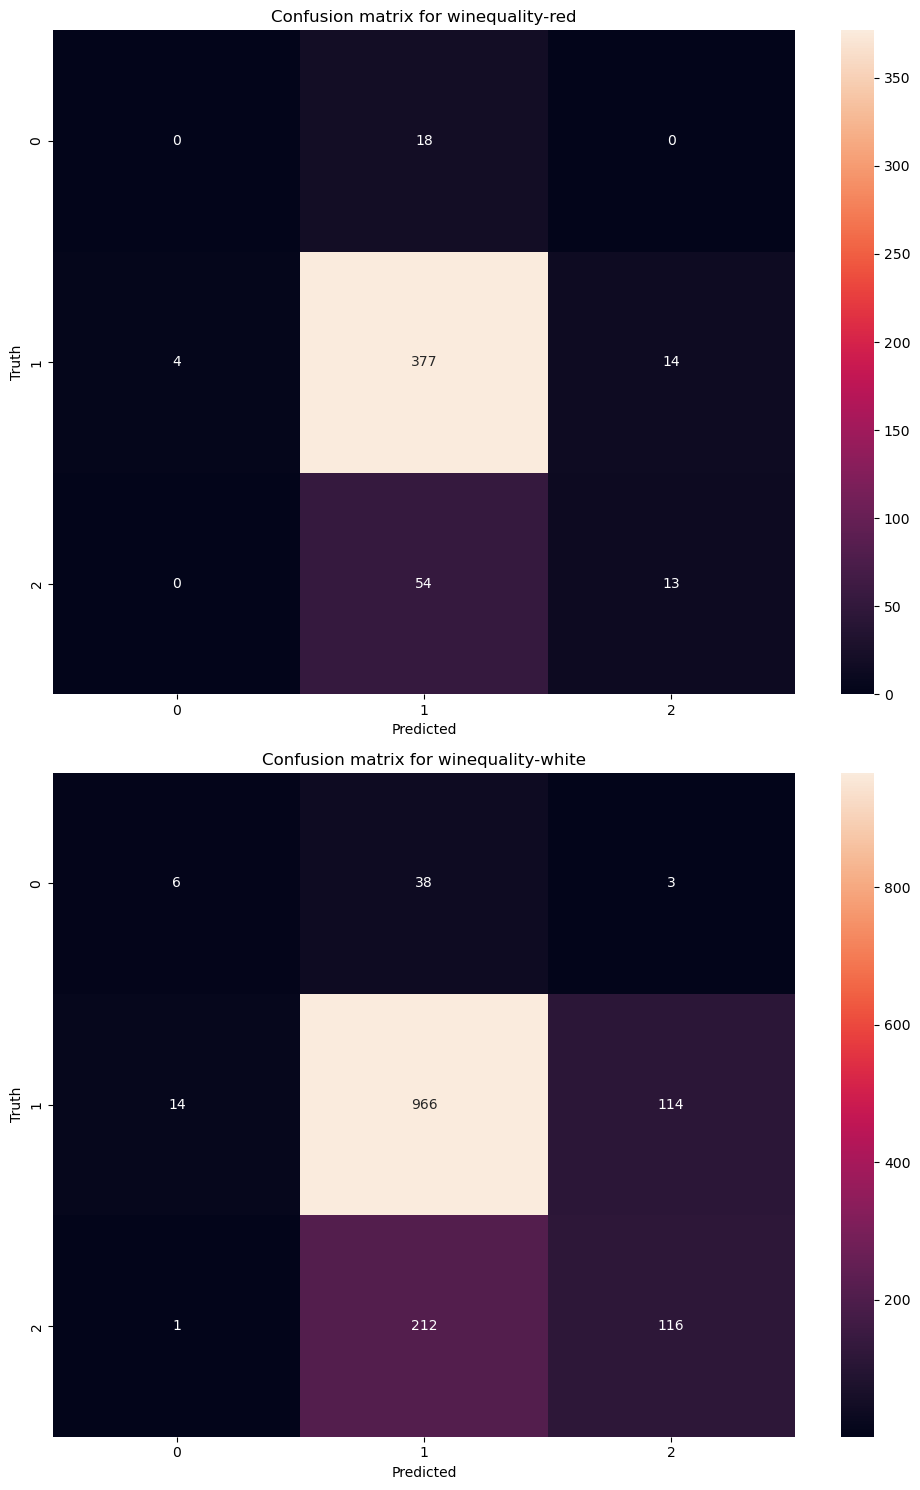

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import DataHandler as dh
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

The accuracy is pretty high but we also know that the dataset is inbalanced. We will try to use SMOTE to balance the dataset and see if the accuracy will change. But before that we will try to use the most important features. 

# KNN with most important features

The following test is only with rank 1 features which were chosen with RFE (Recursive Feature Elimination). The features were chosen with the following code:
- Red: [`alcohol`, `density`, `sulphates`, `total sulfur dioxide`, `volatile acidity`]
- White: [`alcohol`, `density`, `free sulfur dioxide`, `residual sugar` ,`total sulfur dioxide`]


Accuracy of KNN on winequality-red: 0.8125
Accuracy of KNN on winequality-white: 0.7401360544217687


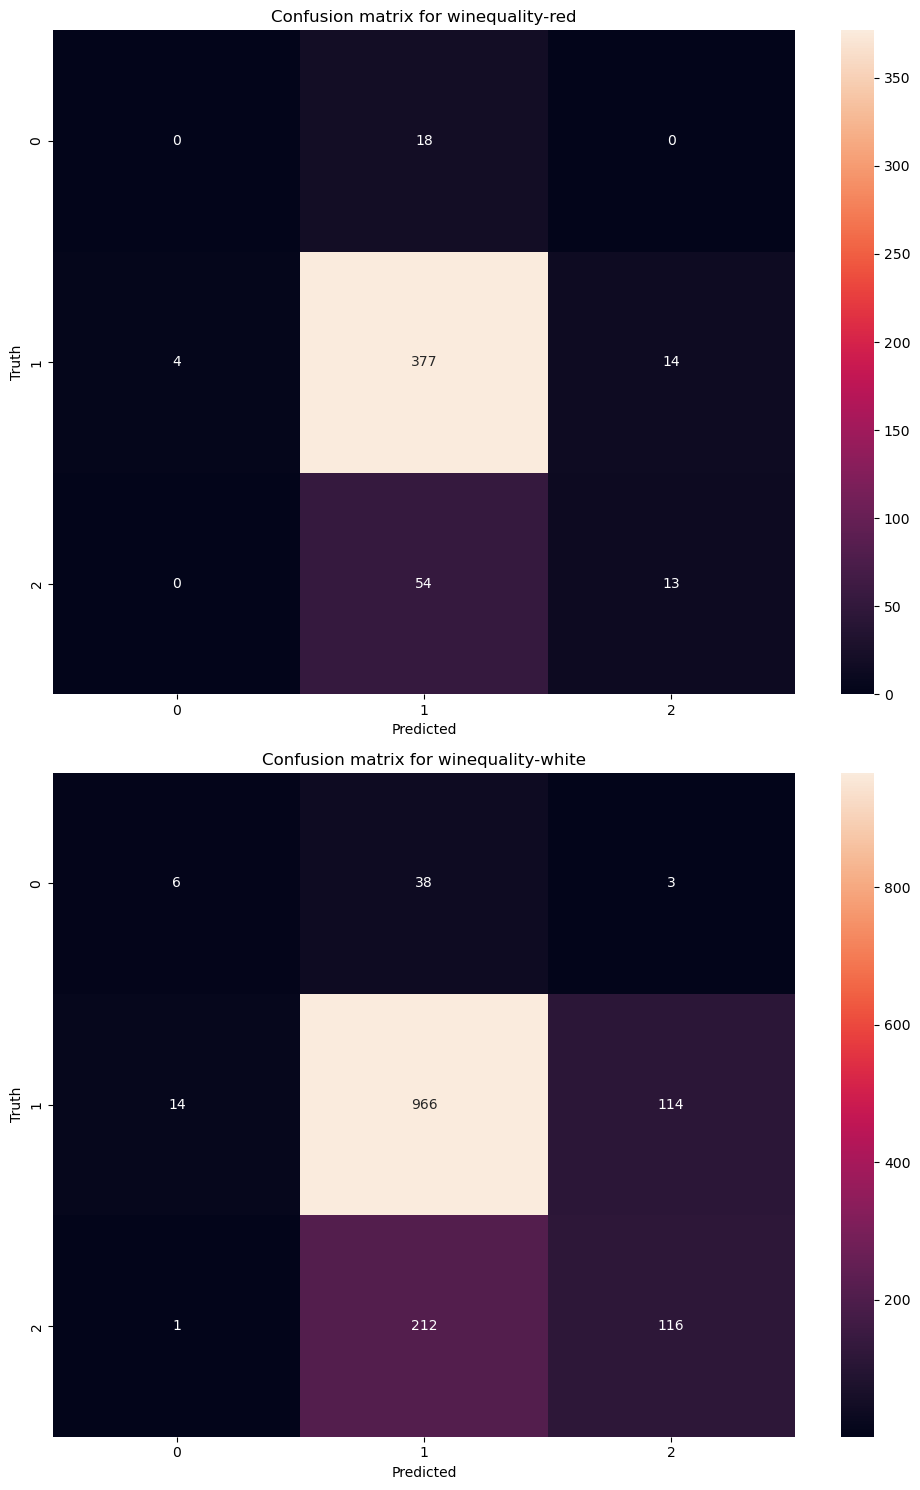

In [3]:
for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

There is no significant change in the accuracy. Still the inbalanced dataset is a problem. We will try to use SMOTE to balance the dataset and see if the accuracy will change. We will still try only with the most important features.

# SMOTE - Synthetic Minority Oversampling Technique

SMOTE addresses imbalanced datasets by generating synthetic instances for the minority class. It selects minority samples, identifies neighbors, and creates synthetic points along connecting lines. This balances class distribution, enhancing model performance in scenarios with class imbalance.

Steps:
- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced

Accuracy of KNN on winequality-red: 0.8097643097643098
Accuracy of KNN on winequality-white: 0.7972644376899696


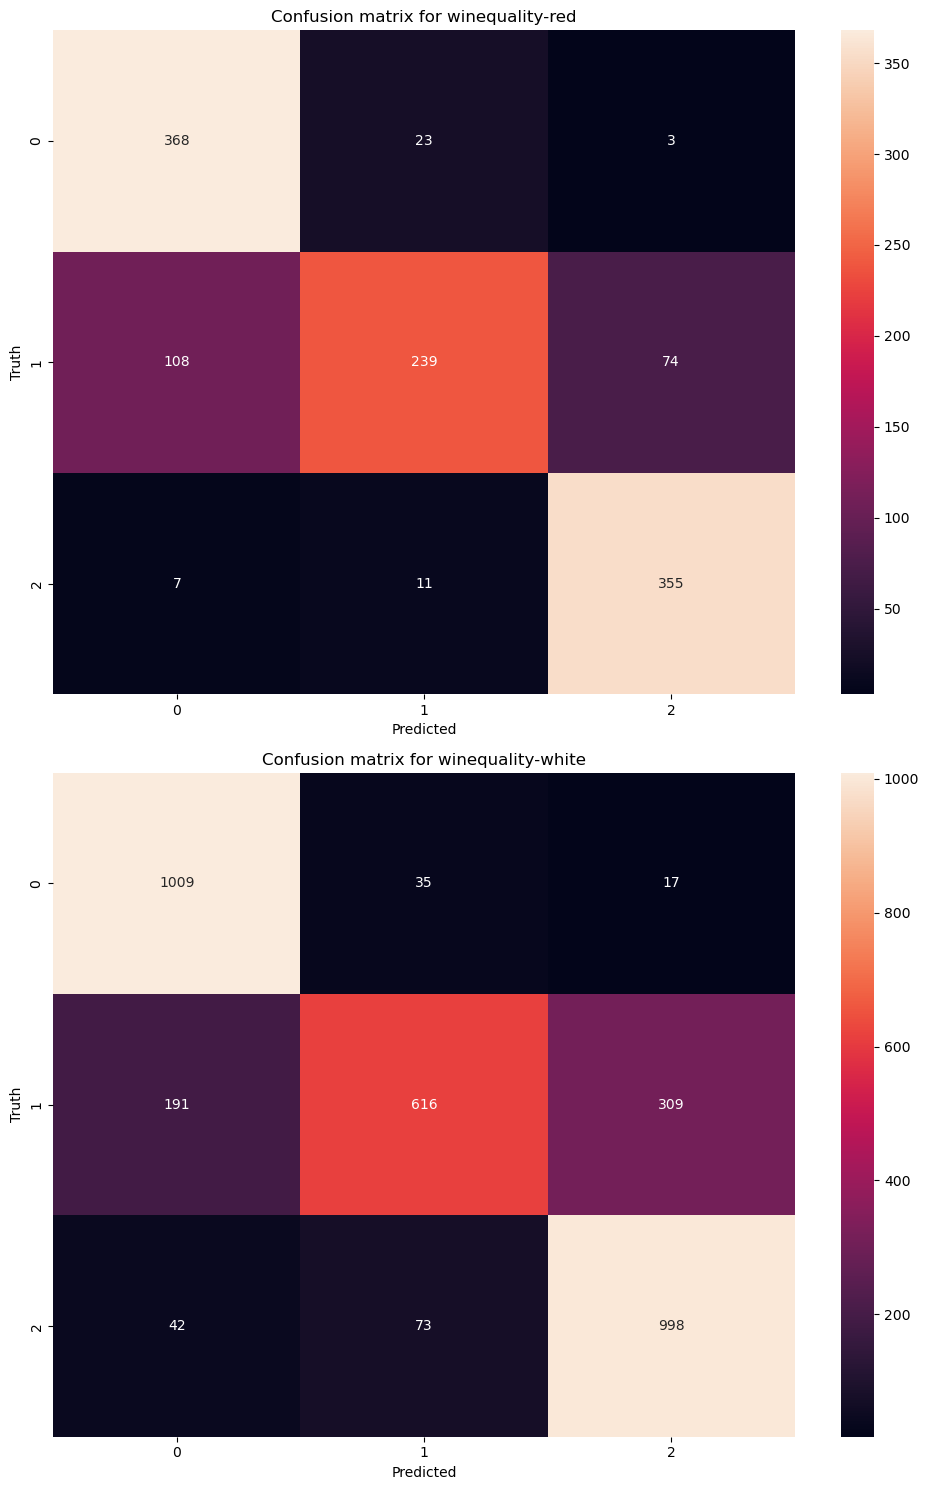

In [4]:
from imblearn.over_sampling import SMOTE


for i, (dataset_name, df) in enumerate(datasets.items()):
    if dataset_name == "winequality-red":
        selected_columns = ['alcohol', 'density', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
    elif dataset_name == "winequality-white":
        selected_columns = ['alcohol', 'density', 'free sulfur dioxide', 'residual sugar' ,'total sulfur dioxide']
    X = df[selected_columns]

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    # use SMOTE to balance the dataset
    oversample = SMOTE(random_state=42)
    X, y = oversample.fit_resample(X, y)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

The confusion matrix looks better now. For red wine accuracy is lower but for white wine accuracy is higher. However, the changes in accuracy are not significant. 

# Test with dataset made in RandomRemove.ipynb (Explaination in the file) 

Now we will try to use datasets (created before in RandomRemove.ipynb and explained there): 
- with removed rows (10%, 20%, 30$)
- with resotred rows (10%, 20%, 30$)

We will use all the features since we saw that the most important features are not so important for the accuracy.

# Removed rows

Accuracy of KNN on white_wine_30: 0.6
Accuracy of KNN on white_wine_20: 0.7314814814814815
Accuracy of KNN on red_wine_10: 0.7941176470588235
Accuracy of KNN on red_wine_30: 0.8333333333333334
Accuracy of KNN on red_wine_20: 0.8536585365853658
Accuracy of KNN on white_wine_10: 0.7257683215130024


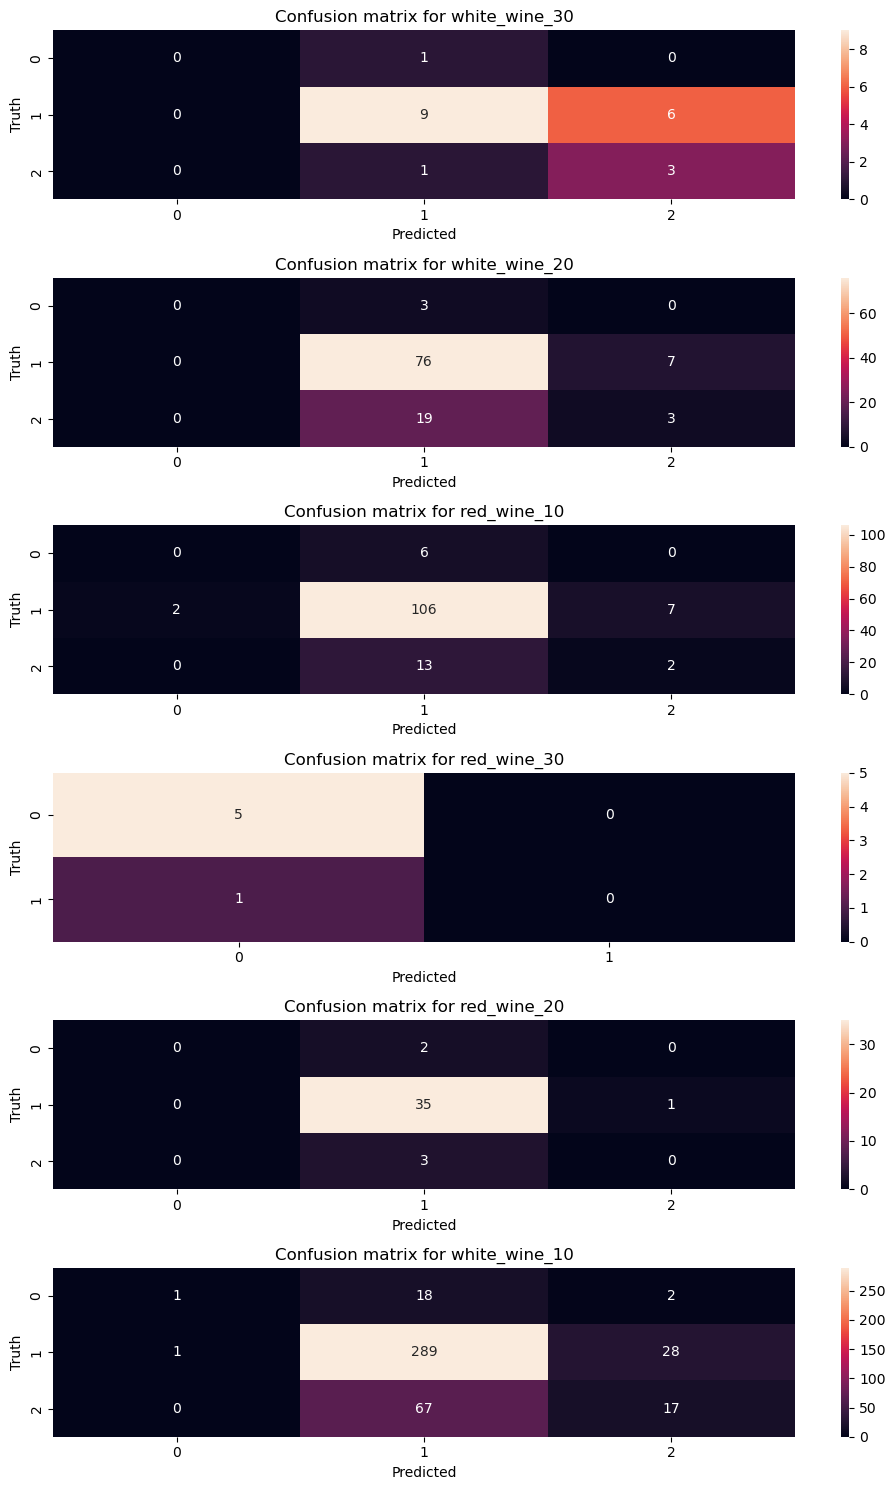

In [5]:
warnings.filterwarnings('ignore', category=UserWarning)
datasets = dh.read_data("data/removed")

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

White:
- Accuracy of KNN on white_wine_30: 0.6
- Accuracy of KNN on white_wine_20: 0.7314814814814815
- Accuracy of KNN on white_wine_10: 0.7257683215130024

Red:
- Accuracy of KNN on red_wine_30: 0.8333333333333334
- Accuracy of KNN on red_wine_20: 0.8536585365853658
- Accuracy of KNN on red_wine_10: 0.7941176470588235

We can clearly see that the less removed rows the better accuracy. Which is logical since we have more data to train the model. Now we will try to use restored rows and see if the accuracy will be better. Usually removing rows is not a good idea. Especially if we have a small dataset. Here we can clearly see the bad influence of removing rows.

## Restored rows


Accuracy of KNN on white_wine_30: 0.8047619047619048
Accuracy of KNN on white_wine_20: 0.7666666666666667
Accuracy of KNN on red_wine_10: 0.8354166666666667
Accuracy of KNN on red_wine_30: 0.8708333333333333
Accuracy of KNN on red_wine_20: 0.8541666666666666
Accuracy of KNN on white_wine_10: 0.7523809523809524


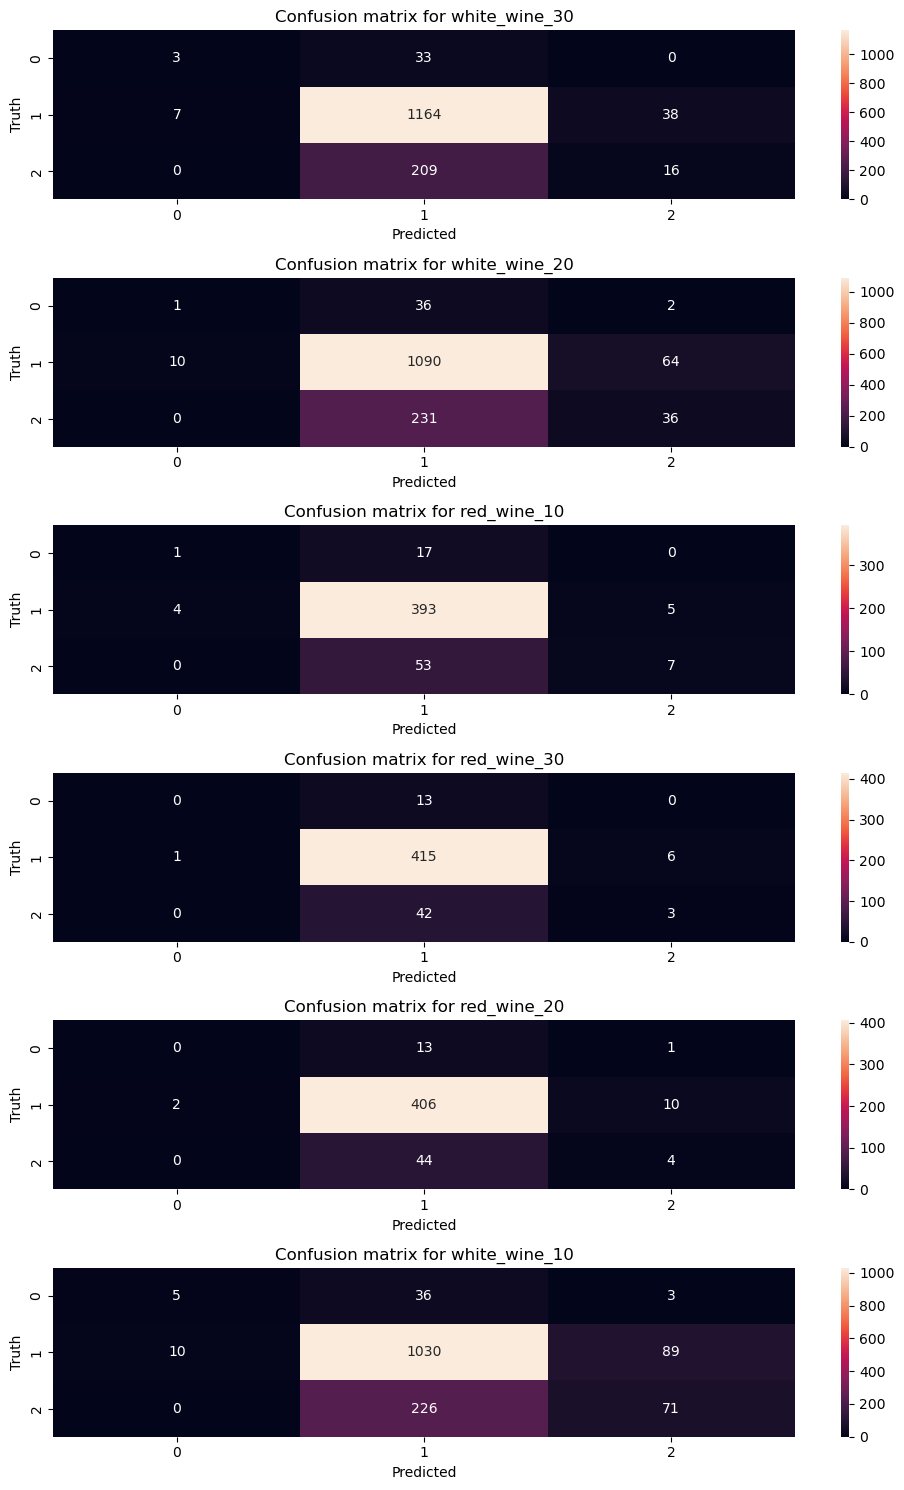

In [6]:
warnings.filterwarnings('ignore', category=UserWarning)
datasets = dh.read_data("data/restored")

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

White:
- Accuracy of KNN on white_wine_30: 0.8047619047619048
- Accuracy of KNN on white_wine_20: 0.7666666666666667
- Accuracy of KNN on white_wine_10: 0.7523809523809524

Red:
- Accuracy of KNN on red_wine_30: 0.8708333333333333
- Accuracy of KNN on red_wine_20: 0.8541666666666666
- Accuracy of KNN on red_wine_10: 0.8354166666666667

We can see that the accuracy is better than the accuracy of the dataset with removed rows. Here we have an opposite situation. The more restored rows the better accuracy. For resotoring we used `fillna()` method. We filled the missing values with the mean of the column. 

By looking at confusion matrixes we can see that the model is even more imbalanced. Since we used the mean of the column to fill the missing values, the values are more similar. The data was already imbalanced and now it is even more imbalanced. The results are better but we can see that the model is not good. Eventually all the wines will be classified in one class with only few from different. 

### Conclusion
The best accuracy is with restored rows. Ussualy removing rows is not a good idea. We can see that here too. The accuracy is better when we restore the rows. In this particular case the accuracy is better when we restore 30% of the rows, than for the original dataset. The reason for this is that might be that the mean of the column is not the best value to fill the missing values. It makes the values more similar and the model can predict better. 

# Data Normalization

Accuracy of KNN on winequality-red: 0.8333333333333334
Accuracy of KNN on winequality-white: 0.8020408163265306


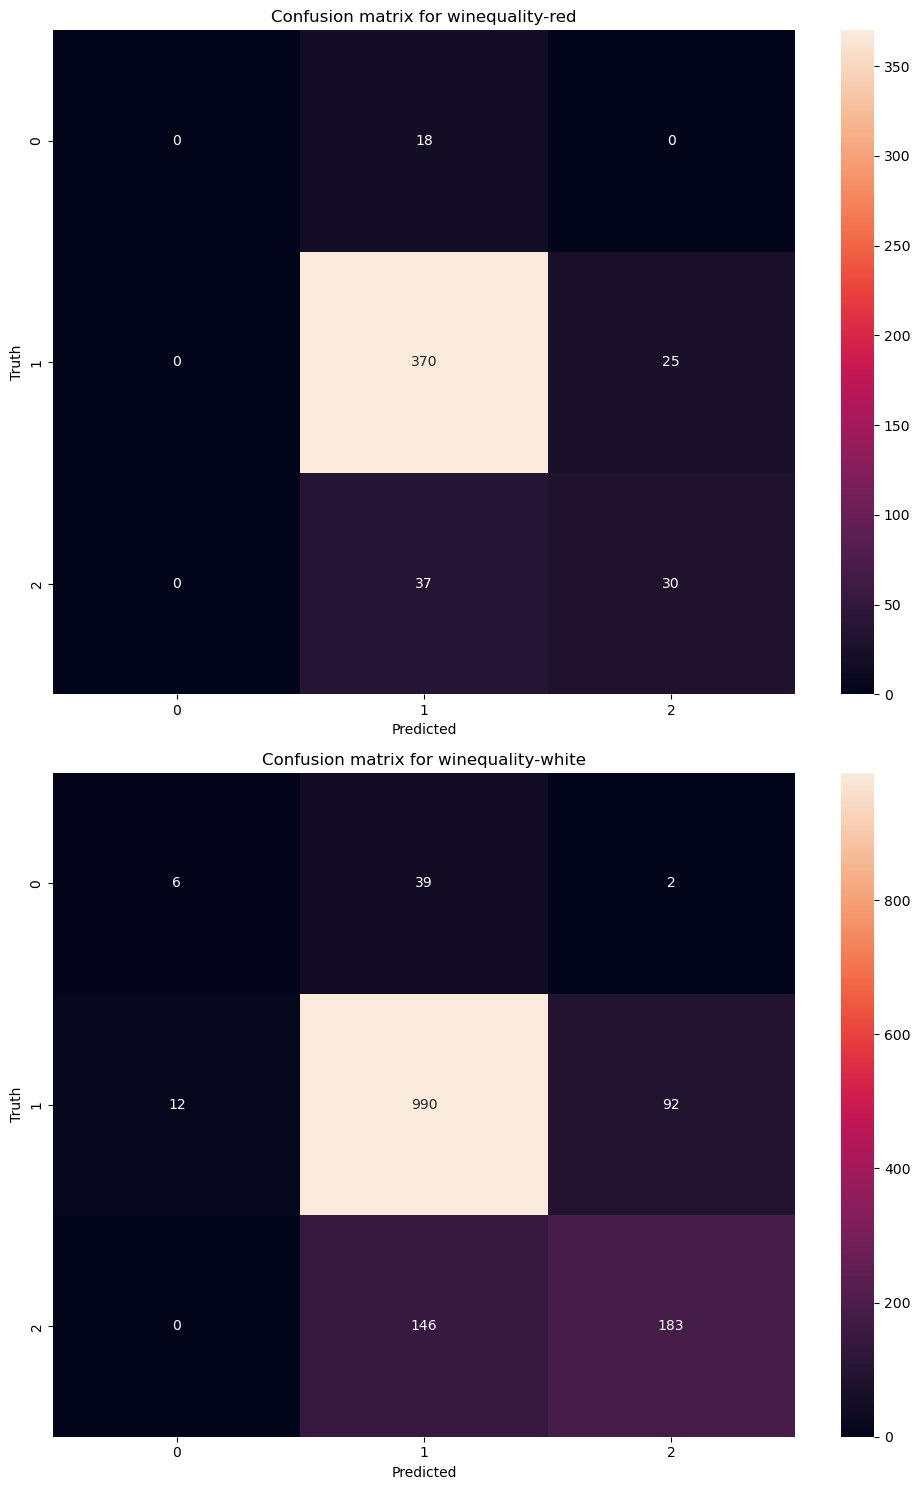

In [9]:
from sklearn.preprocessing import StandardScaler

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):

    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalization of the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

Red:
- Accuracy of KNN on winequality-red: 0.8333333333333334

White:
- Accuracy of KNN on winequality-white: 0.8020408163265306

The model is little better after normalization the data. However, the changes are not significant.

We will try to use SMOTE to balance the dataset and see if the accuracy will change.

# SMOTE - Synthetic Minority Oversampling Technique with normalized data

Accuracy of KNN on winequality-red: 0.8619528619528619
Accuracy of KNN on winequality-white: 0.8261398176291793


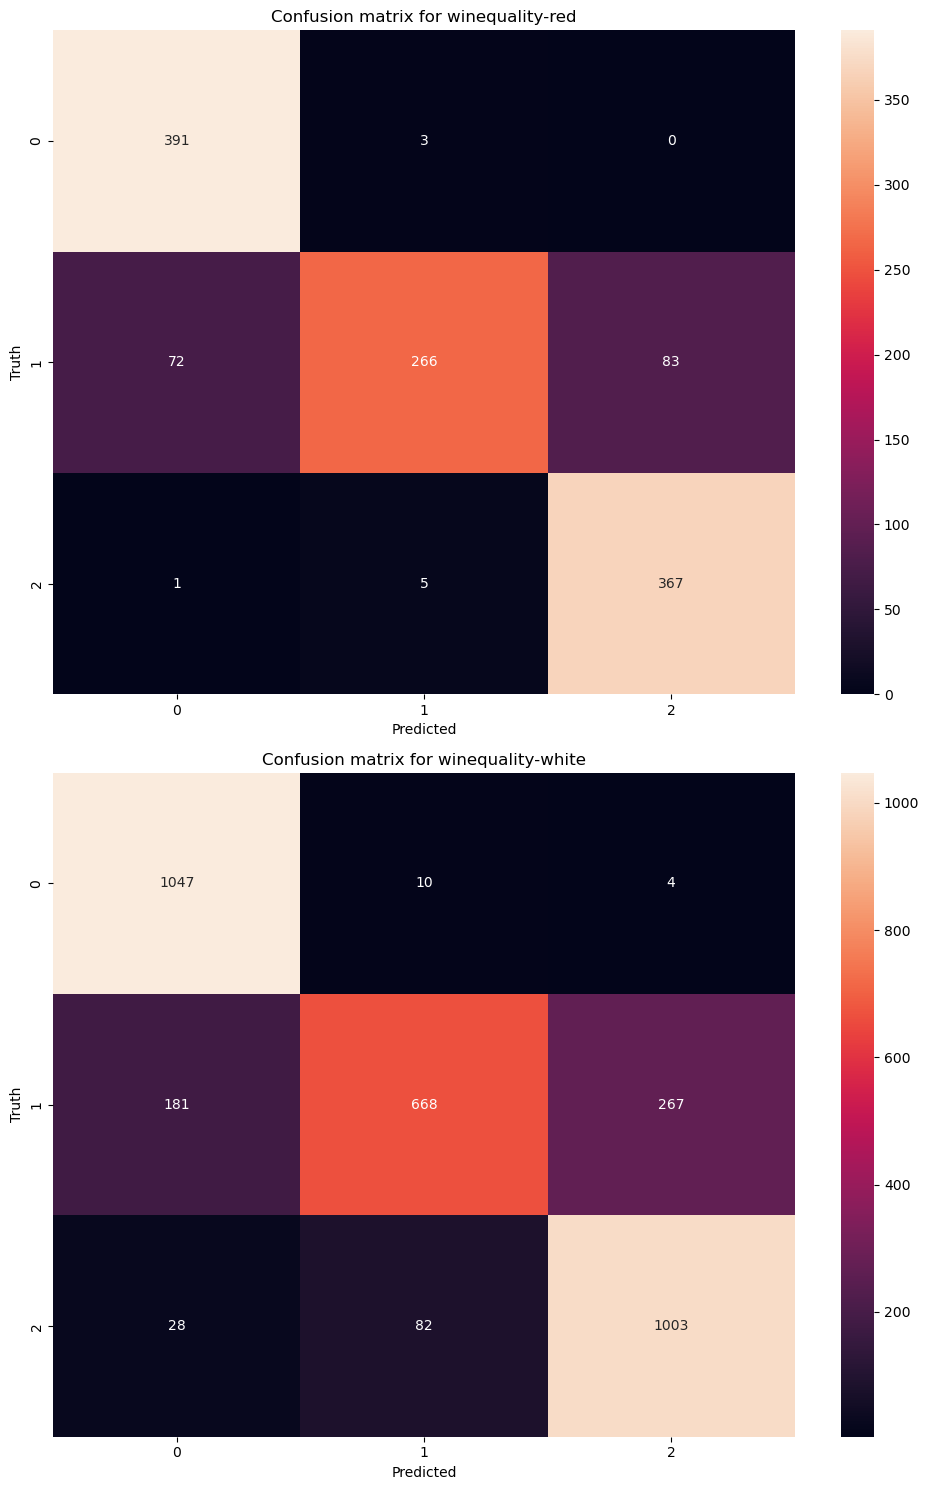

In [10]:
from sklearn.preprocessing import StandardScaler

datasets = dh.read_data("data/full")

fig, axs = plt.subplots(len(datasets), 1, figsize=(10, 15))

for i, (dataset_name, df) in enumerate(datasets.items()):

    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 6, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    # use SMOTE to balance the dataset
    oversample = SMOTE(random_state=42)
    X, y = oversample.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalization of the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = KNeighborsClassifier()

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of KNN on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axs[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Truth')
    axs[i].set_title(f"Confusion matrix for {dataset_name}")

plt.tight_layout()
plt.show()

Red:
- Accuracy of KNN on winequality-red: 0.8619528619528619

White:
- Accuracy of KNN on winequality-white: 0.8261398176291793

The accuracy is better than the accuracy of the dataset without SMOTE. However, the changes are not significant. The look of confusion matrixes are better. 

Usually normalization is a good idea. However, in this case the changes are not significant. The reason for this might be that the data is small and the values are already in similar range. 

# KNN with different number of neighbors
Test were done with different number of neighbors. The best accuracy was with 5 neighbors. The accuracy was lower with 1 neighbor. The accuracy was the similar with 3 and 5 neighbors.